# Cifar10 deep nn 


In [62]:
from keras.datasets import cifar10
import numpy as np
from tensorflow.keras.utils import to_categorical


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [63]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [64]:
X_train = X_train/255
X_test = X_test/255
print(X_train.shape)

X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)
print(X_train.shape)
print(y_train[0])  

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_train[0])  
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 3072)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(50000, 10)


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)

model = Sequential()

model.add(Dense(100, activation = "elu", kernel_initializer = 'he_normal', input_shape = (3072,)))


for i in range(20):
    model.add(Dense(100, activation = 'elu', kernel_initializer = 'he_normal'))

model.add(Dense(10, activation = 'sigmoid'))

learning_rates = [0.1,0.01,0.001,0.0001]
# learning_rates = [0.0001]

for lr in learning_rates:
    print(f"learning rate : {lr}" )
    model.compile(optimizer=Nadam(learning_rate= lr), loss = "categorical_crossentropy", metrics="accuracy")
    history = model.fit(X_train, y_train, validation_split = 0.3, batch_size =128, epochs = 30, callbacks=[early_stopping])
    accuracy, loss = model.evaluate(X_test, y_test)
    print(f"loss, accuracy for {lr}", accuracy, loss)

learning rate : 0.1
Epoch 1/30
274/274 [==============================] - 12s 21ms/step - loss: 17276917760.0000 - accuracy: 0.0997 - val_loss: 2.7413 - val_accuracy: 0.1017
Epoch 2/30
274/274 [==============================] - 5s 17ms/step - loss: 2.3578 - accuracy: 0.0997 - val_loss: 2.3054 - val_accuracy: 0.0999
Epoch 3/30
274/274 [==============================] - 5s 17ms/step - loss: 2.3046 - accuracy: 0.1024 - val_loss: 2.3048 - val_accuracy: 0.0979
Epoch 4/30
274/274 [==============================] - 5s 17ms/step - loss: 2.3047 - accuracy: 0.0996 - val_loss: 2.3046 - val_accuracy: 0.0999
Epoch 5/30
274/274 [==============================] - 5s 17ms/step - loss: 2.3053 - accuracy: 0.1011 - val_loss: 2.3050 - val_accuracy: 0.1017
Epoch 6/30
274/274 [==============================] - 5s 17ms/step - loss: 2.3054 - accuracy: 0.0995 - val_loss: 2.3051 - val_accuracy: 0.0984
Epoch 7/30
274/274 [==============================] - 5s 17ms/step - loss: 2.3053 - accuracy: 0.0994 - val_loss

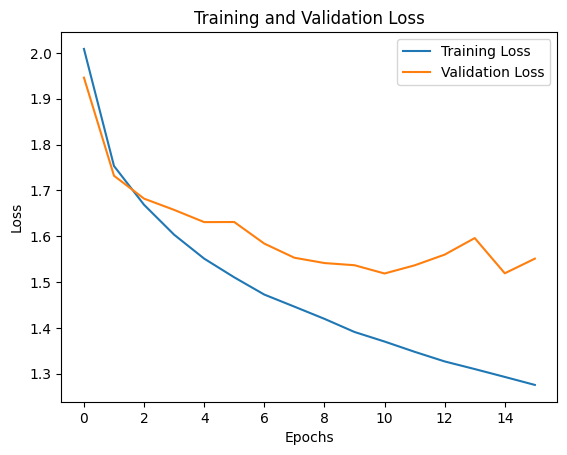

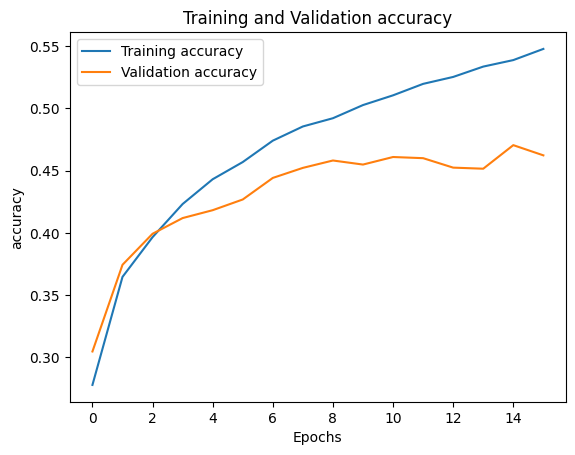

In [66]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation accuracy')

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization, Activation


early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)

model = Sequential()

model.add(Dense(100, activation = "elu", kernel_initializer = 'he_normal', input_shape = (3072,)))


for i in range(20):
    model.add(Dense(100, activation = 'elu', kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))

model.add(Dense(10, activation = 'sigmoid'))

# learning_rates = [0.1,0.01,0.001,0.0001]
learning_rates = [0.0001]

for lr in learning_rates:
    print(f"learning rate : {lr}" )
    model.compile(optimizer=Nadam(learning_rate= lr), loss = "categorical_crossentropy", metrics="accuracy")
    history_with_bn = model.fit(X_train, y_train, validation_split = 0.3, batch_size =128, epochs = 30, callbacks=[early_stopping])
    accuracy, loss = model.evaluate(X_test, y_test)
    print(f"loss, accuracy for {lr}", accuracy, loss)

learning rate : 0.0001
Epoch 1/30
274/274 [==============================] - 21s 30ms/step - loss: 2.4591 - accuracy: 0.1541 - val_loss: 2.3456 - val_accuracy: 0.1633
Epoch 2/30
274/274 [==============================] - 7s 27ms/step - loss: 2.1062 - accuracy: 0.2408 - val_loss: 2.0858 - val_accuracy: 0.2438
Epoch 3/30
274/274 [==============================] - 8s 27ms/step - loss: 1.9513 - accuracy: 0.2945 - val_loss: 2.0240 - val_accuracy: 0.2738
Epoch 4/30
274/274 [==============================] - 7s 27ms/step - loss: 1.8561 - accuracy: 0.3290 - val_loss: 1.9089 - val_accuracy: 0.3137
Epoch 5/30
274/274 [==============================] - 7s 26ms/step - loss: 1.7859 - accuracy: 0.3555 - val_loss: 1.8321 - val_accuracy: 0.3364
Epoch 6/30
274/274 [==============================] - 7s 27ms/step - loss: 1.7333 - accuracy: 0.3804 - val_loss: 1.8343 - val_accuracy: 0.3455
Epoch 7/30
274/274 [==============================] - 7s 26ms/step - loss: 1.6877 - accuracy: 0.3935 - val_loss: 1.782

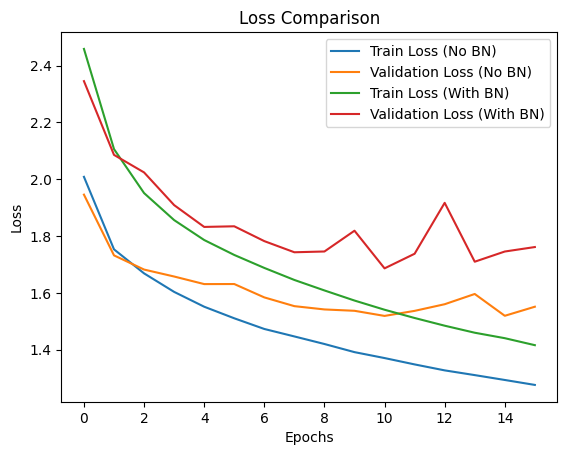

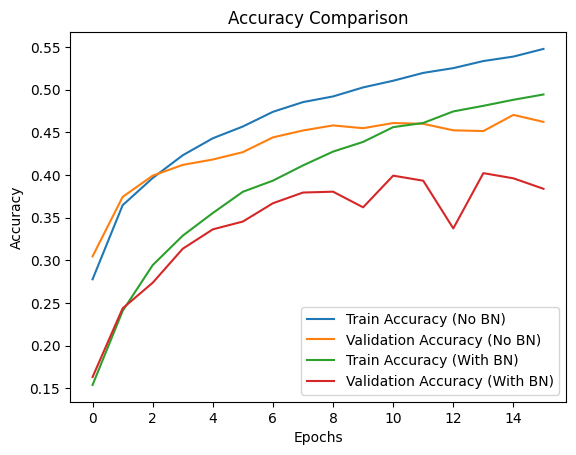

In [82]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss (No BN)')
plt.plot(history.history['val_loss'], label='Validation Loss (No BN)')
plt.plot(history_with_bn.history['loss'], label='Train Loss (With BN)')
plt.plot(history_with_bn.history['val_loss'], label='Validation Loss (With BN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy (No BN)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (No BN)')
plt.plot(history_with_bn.history['accuracy'], label='Train Accuracy (With BN)')
plt.plot(history_with_bn.history['val_accuracy'], label='Validation Accuracy (With BN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Comparison')
plt.show()


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "NAG": SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "AdaGrad": 'adagrad',
    "RMSProp": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001),
    "Nadam": Nadam(learning_rate=0.001)
}

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)

model = Sequential()

model.add(Dense(100, activation = "elu", kernel_initializer = 'he_normal', input_shape = (3072,)))


for i in range(20):
    model.add(Dense(100, activation = 'elu', kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))

model.add(Dense(10, activation = 'sigmoid'))


for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer")
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=30,
        batch_size=128,
        callbacks=[early_stopping]
    )
    accuracy, loss = model.evaluate(X_test, y_test)
    print(f"loss, accuracy", accuracy, loss)
    print(f"Final validation accuracy with {opt_name}: {max(history.history['val_accuracy'])}")

Training with SGD optimizer
Epoch 1/30
313/313 [==============================] - 14s 27ms/step - loss: 2.2991 - accuracy: 0.1920 - val_loss: 2.1955 - val_accuracy: 0.2231
Epoch 2/30
313/313 [==============================] - 7s 24ms/step - loss: 1.9459 - accuracy: 0.2975 - val_loss: 2.0506 - val_accuracy: 0.2796
Epoch 3/30
313/313 [==============================] - 7s 23ms/step - loss: 1.8361 - accuracy: 0.3365 - val_loss: 1.8548 - val_accuracy: 0.3325
Epoch 4/30
313/313 [==============================] - 7s 23ms/step - loss: 1.7692 - accuracy: 0.3621 - val_loss: 1.8281 - val_accuracy: 0.3443
Epoch 5/30
313/313 [==============================] - 6s 21ms/step - loss: 1.7192 - accuracy: 0.3804 - val_loss: 1.8439 - val_accuracy: 0.3485
Epoch 6/30
313/313 [==============================] - 7s 21ms/step - loss: 1.6750 - accuracy: 0.3992 - val_loss: 1.8338 - val_accuracy: 0.3526
Epoch 7/30
313/313 [==============================] - 6s 21ms/step - loss: 1.6370 - accuracy: 0.4129 - val_loss: 